# HW1: Practice with Python, hard-margin SVM, and linear regression

## Name: Alexander Scheibe NetID: avscheibe

Hello Students:

- Start by downloading HW1.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- I've included the output from my solution in HW1.html so you can check your
  work. Your output should match or be close to mine. Use 3 significant
  figures for floats. e.g. We can print 3 figures for ðœ‹/1000 as
  print(f'{np.pi/1000:.3}'). The pattern is print(f'{x:.precision}'),
  where x is the value to print and precision is the number of figures.
- If you have questions, please ask them in class or office hours. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- Please clean up your code:
  - Comment out unnecessary code that is useful for orienting you, like printing the data set.
  - Label your output, like writing 'weight=20.1' or 'The weight is 20.1' rather than just '20.1'.
  - Simplify your code if you can.
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW01.ipynb to Canvas's HW01.ipynb assignment
  - HW01.html to Canvas's HW01.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2a, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, linear_model

# 1. Use a hard-margin SVM
 to classify cars as having automatic or manual transmissions.
- Read [http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv](http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv) into a DataFrame. (This is the mtcars data frame from R with two of its rows removed to get linearly separable data.)
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0).)
- Make an X from the wt (weight in 1000s of pounds) and mpg (miles per gallon) columns. Make y from the am column (where 0=automatic
  or 1=manual transmission).
- Train an SVM using kernel='linear' and C=1000. Print its coefficients and intercept.
- Report the training accuracy. (It's given by clf.score(X, y).)
- Predict the transmission for a car weighing 4000 pounds (wt=4) that gets 20 mpg.
- Use five plt.plot() calls to make a figure with wt on its x-axis and mpg on its y-axis including:
  - the automatic transmission cars in red
  - the manual transmission cars in blue
  - the decision boundary (the center line of the road)
  - the lower margin boundary (the left side of the road)
  - the upper margin boundary (the right side of the road)
  - a reasonable title, axis labels, and legend

WT Coefficient = -8.244
MPG Coefficient = -0.309
Intercept = 32.020
Training accuracy: 1.000

The car has an automatic transmission.



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


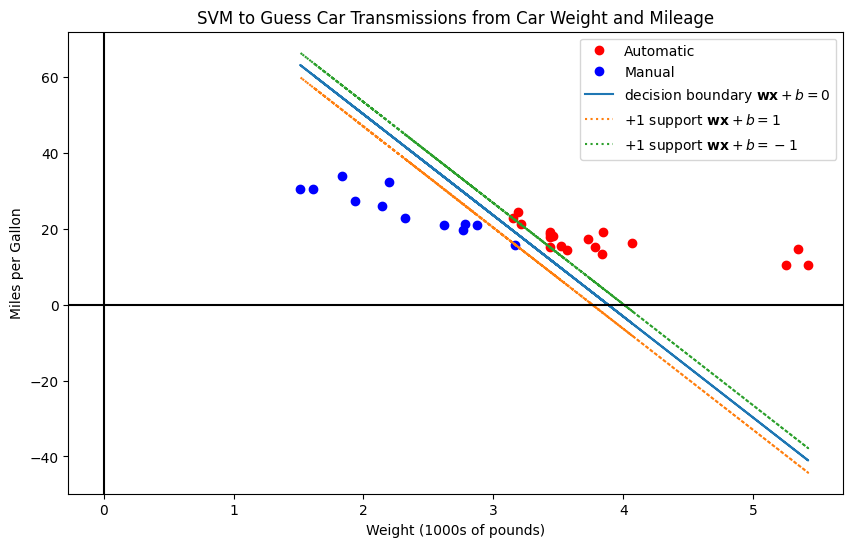

In [2]:
df = pd.read_csv('mtcars30.csv')

# Making x and y
X = df[['wt', 'mpg']]
y = df['am']

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Print coefficients and intercept

print(f"WT Coefficient = {clf.coef_[0][0]:.3f}")
print(f"MPG Coefficient = {clf.coef_[0][1]:.3f}")
print(f"Intercept = {clf.intercept_[0]:.3f}")

# Report the training accuracy
accuracy = clf.score(X, y)
print(f"Training accuracy: {accuracy:.3f}")


# Predict the transmission
pred = clf.predict([[4, 20]])

if pred == 0:
    print("\nThe car has an automatic transmission.\n")
else:
    print("\nThe car has a manual transmission.\n")


# Create a figure (with 5 plt.plot function calls)
# A lot of the boiler plate was pulled from lecture
plt.figure(figsize=(10, 6))

plt.plot(df['wt'][df['am'] == 0], df['mpg'][df['am'] == 0], 'ro', label='Automatic') 
plt.plot(df['wt'][df['am'] == 1], df['mpg'][df['am'] == 1], 'bo', label='Manual')

ax = plt.gca()
x1 = X.iloc[:, 0].values
x2 = -(clf.coef_[0][0] * x1 + clf.intercept_) / clf.coef_[0][1]

plt.plot(x1, x2, label=r'decision boundary $\mathbf{wx} + b = 0$')
plt.plot(x1, x2 + 1 / clf.coef_[0][1], ':', label=r'+1 support $\mathbf{wx} + b =  1$')
plt.plot(x1, x2 - 1 / clf.coef_[0][1], ':', label=r'+1 support $\mathbf{wx} + b = -1$')

plt.title("SVM to Guess Car Transmissions from Car Weight and Mileage")
plt.xlabel("Weight (1000s of pounds)")
plt.ylabel("Miles per Gallon")

plt.axvline(x=0, c='k')
plt.axhline(y=0, c='k')
plt.legend()
plt.show(block=False)



# 2. Make three linear regression models.


## 2a: Make a simple regression model by hand.
Use the matrix formula $w = (X^T X)^{-1} X^T y$ we developed in class to fit these three points:
(0, 5), (2, 1), (4, 3). (Use linear_model.linearRegression(), if you wish, to check your work.)

y = -0.5x + 4


## 2b: Make a simple linear regression model from real data.
Estimate the average daily trading volume of a Dow Jones Industrial Average stock from its market capitalization. That is, use $y = $ AvgVol vs. $x =$ MarketCap.
- Read [http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv](http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv) into a DataFrame.
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol').)
- Find the model. Print its equation.
- Print its $R^2$ value (the proportion of variability in $y$ accounted for by $x$ via the linear model, given by model.score(X, y)).
- Make a plot of the data and model line.
- Use the model to predict the volume for a company with market capitalization of 0.25e12 (a quarter-trillion dollars); add this as a red point on your plot.
- Say what happens to Volume as Market Capitalization increases. (Use a Markdown cell.)

Model equation: y = 3.41e+06 + 2.68e-05x
R^2 = 0.705


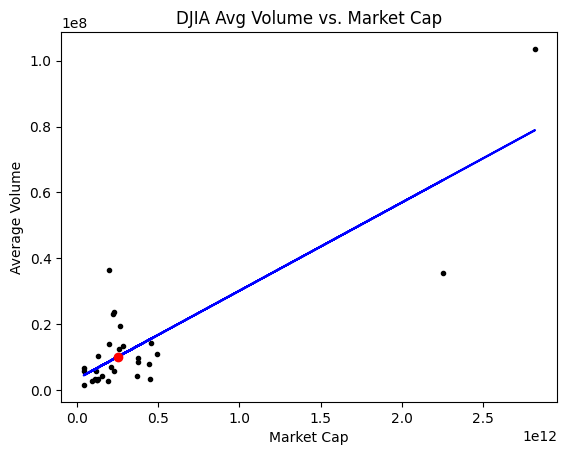

In [3]:
# ... your code here ...
df = pd.read_csv('DJIA.csv', index_col='Symbol')

model = linear_model.LinearRegression()

y = df["AvgVol"].values
X = df["MarketCap"].values.reshape(-1, 1)

fit = model.fit(X = X, y = y)

print(f"Model equation: y = {fit.intercept_:.3} + {fit.coef_[0]:.3}x")
print(f"R^2 = {model.score(X, y):.3}")

plt.plot(X, y, '.', color='black', label='data')
plt.title("DJIA Avg Volume vs. Market Cap")
plt.ylabel("Average Volume")
plt.xlabel("Market Cap")
plt.plot(X, model.predict(X), color='blue')
plt.plot(0.25e12, model.predict([[0.25e12]]), marker="o", color = "red")
plt.show()

Based on the model shown, as market cap increases, average volume is expected to increase as well.

## 2c Make a multiple regression model.
Estimate the same volume from both market capitalization and price. That is, use $y =$ AvgVol vs. $x_1 =$ MarketCap and $x_2 =$ Price.
- Find the model.
- Print its equation.
- Print its $R^2$ value.
- Say what happens to Volume as Market Capitalization increases and what happens to Volume as Price increases (while holding the other variable fixed). (Use a Markdown cell.)

In [4]:
# ... your code here ...
df = pd.read_csv('DJIA.csv', index_col='Symbol')

model = linear_model.LinearRegression()

y = df["AvgVol"].values
X = df[["MarketCap", "Price"]]


fit = model.fit(X = X, y = y)

print(f"Volume = {fit.coef_[0]:.3} * Market Cap + {fit.coef_[1]:.3} * Price {fit.intercept_:.3}")
print(f"R^2 = {model.score(X, y):.3}")




Volume = 2.89e-05 * Market Cap + -6.69e+04 * Price 1.44e+07
R^2 = 0.823


Based on the model:

As Market Cap increases (while holding Price fixed), volume increases.
As Price increases (while holding Market Cap fixed), volume decreases.
